# Visualizing Energy Data
----
 The plots here are made using data downloaded from the ENTSO-E API. 


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator

def getCountryList():
    test1 = ["DE","FR","NO"]
    list1 = ["DE","FR", "BE","BG","HR","CZ","EE","FI","GR","HU","IT","LV","LT","LU","ME","NL","NO","PL","PT","SK","CH"]
    actualMissing = ["DK","XK","MK","RO","SI","ES","SE"]
    forecastFound = ["BE","CH","CZ","DE","FI","HU","LT","NL","PL"]
    return forecastFound

def countryName(ky):
    countries = {'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czech Republic', 'DE': 'Germany', 'DK': 'Denmark', 'EE': 'Estonia', 'ES': 'Spain', 'FI': 'Finland', 'FR': 'France', 'GR': 'Greece', 'HR': 'Croatia', 'HU': 'Hungary', 'IE': 'Ireland', 'IT': 'Italy', 'LT': 'Lithuania', 'LU': 'Luxembourg', 'LV': 'Latvia', 'MT': 'Malta', 'NL': 'Netherlands', 'PL': 'Poland', 'PT': 'Portugal',  'RO': 'Romania',   'SE': 'Sweden','SI': 'Slovenia', 'SK': 'Slovakia', 'CH': 'Switzerland',"ME":"Montenegro","MK":"North Macedonia","NO":"Norway"}
    return countries[ky]

def getCountryData(code,dataType,startDate,endDate):
    csv_file = './rawData/'+code+'-202001010000-202301010000-'+dataType+'-60.csv'
    start_date = pd.to_datetime(startDate)
    end_date = pd.to_datetime(endDate)
    filtered_data = filter_data_by_date(csv_file, start_date, end_date)
    return filtered_data

# Method to filter hourly data based on start and end dates
def filter_data_by_date(csv_file, start_date, end_date):
    # Load CSV data into a pandas DataFrame
    df = pd.read_csv(csv_file)
    # Convert 'startTime' column to datetime format
    df['startTime'] = pd.to_datetime(df['startTime'], format='%Y%m%d%H%M')
    #print(df)
    # Filter data based on start and end dates
    filtered_data = df[(df['startTime'] >= start_date) & (df['startTime'] <= end_date)]
    return filtered_data

# Method to create a line chart from hourly data
def create_line_chart(hourly_data,title,column="percentRenewable"):
    plt.figure(figsize=(10, 5))
    if column in hourly_data.columns:
        data = hourly_data[column]
    else:
        data  =  [0] * len(hourly_data)
    plt.plot(hourly_data['startTime'], data, color='#04316a')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title(title)
    # Format x-axis tick labels to show hours
    # hours_locator = HourLocator(interval=1)
    # hours_formatter = DateFormatter('%H:%M')
    # plt.gca().xaxis.set_major_locator(hours_locator)
    # plt.gca().xaxis.set_major_formatter(hours_formatter)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_multiple_line_charts(dataframe, title, column_list):
    """
    Plot multiple line charts based on the specified columns in the given DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column_list (list): List of column names to plot as line charts.
    """
    plt.figure(figsize=(15, 6))
    
    for column in column_list:
        if column in dataframe.columns:
            plt.plot(dataframe['startTime'], dataframe[column], label=column)

    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()
    

## Actual generation hourly plots
----

The plots below are based on the actual generation data for multiple countries. Plot types include: 
- Percentage of energy generated using renewable sources
- Total generation of energy from renewable and non renewable sources

The plots below show what percentage of electricity is produced from renewable sources across mulitple countries for the given time period. The percentages are calculated based on actual generation data. 


The time duration can be adjusted in the cell below :

In [27]:
hourly_start_date="2022-05-01"
hourly_end_date="2022-05-05"

In [96]:
def showPercentageRenewable(data,code,start,end):
    create_line_chart(data,'Hourly Percentage of Renewable Energy in '+countryName(code)+' from '+start+' to '+end)

def showEnergyTypePlot(data,code,start,end):
    print()
    plot_multiple_line_charts(data,"Total generation Renewable vs Non renewable sources in "+countryName(code)+' from '+start+' to '+end,["renewableTotal","nonRenewableTotal"])
    
def showHourlyPlotsforAllCountries(start,end):
    clist = getCountryList()
    for c in clist :
        data = getCountryData(c,"actual",start,end)
        print(countryName(c))
        showPercentageRenewable(data,c,start,end)
        showEnergyTypePlot(data,c,start,end)

Germany


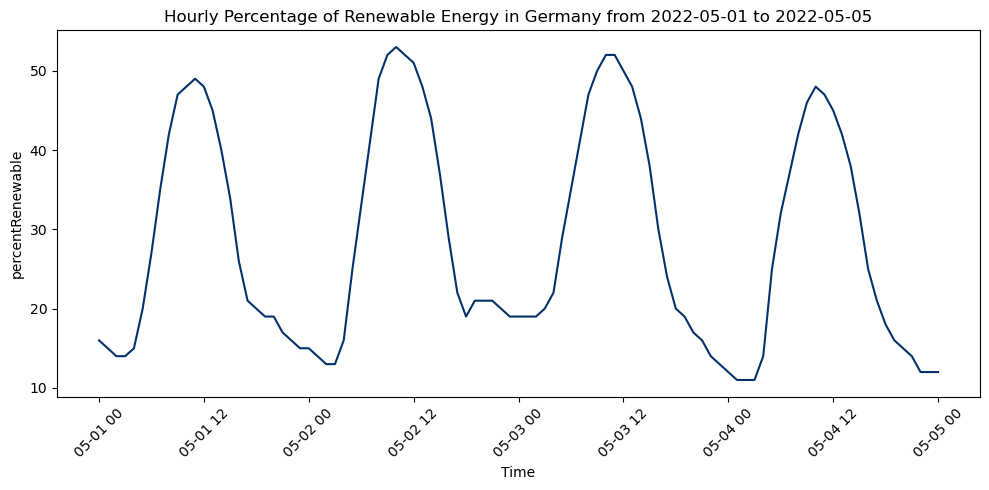

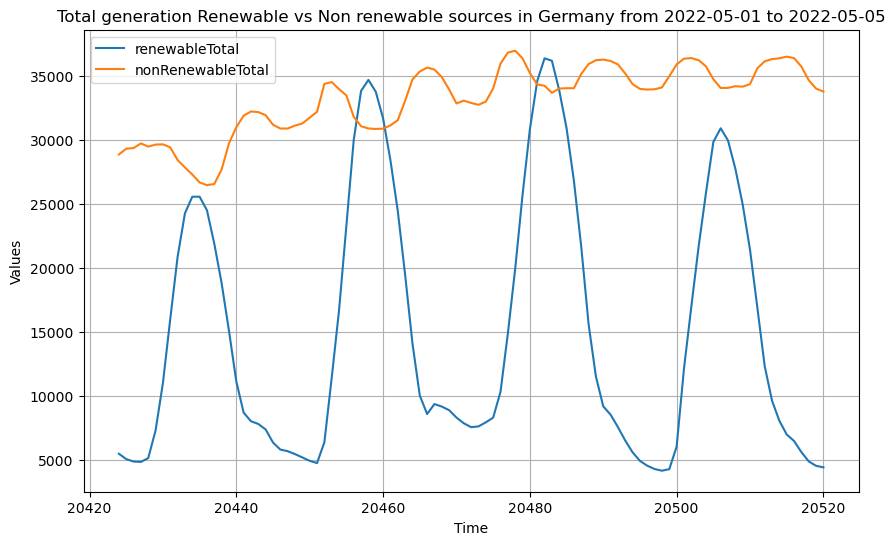

France


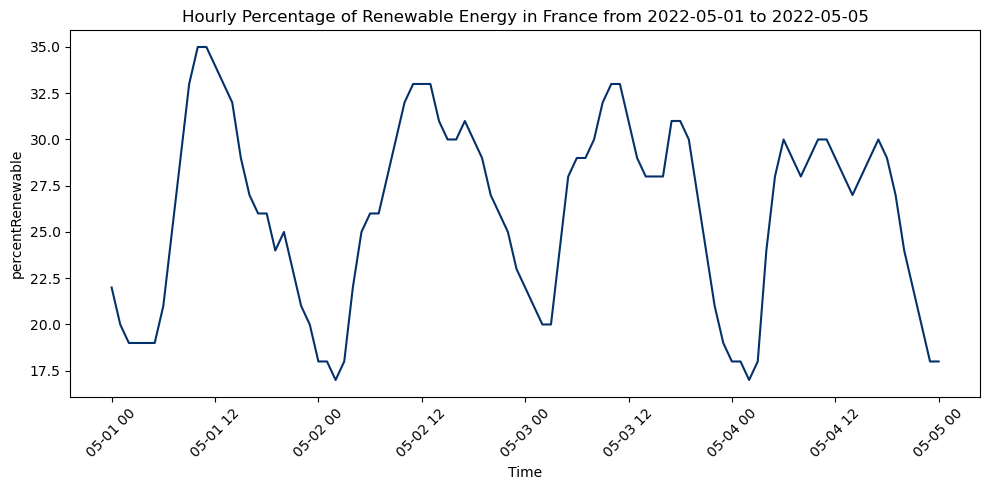

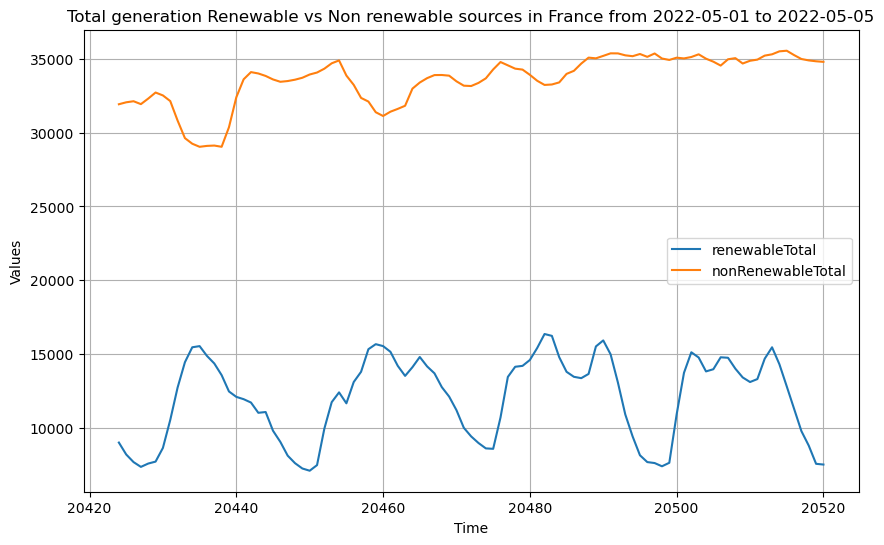

Norway


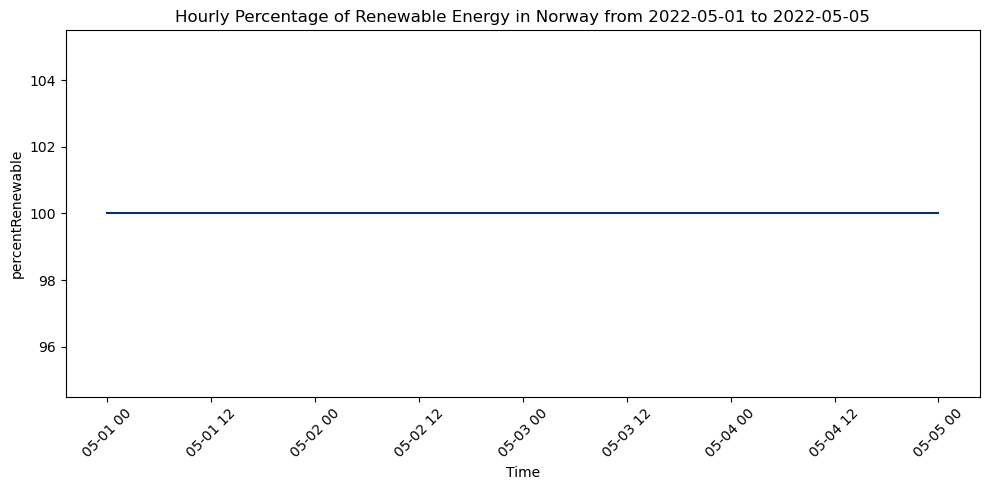

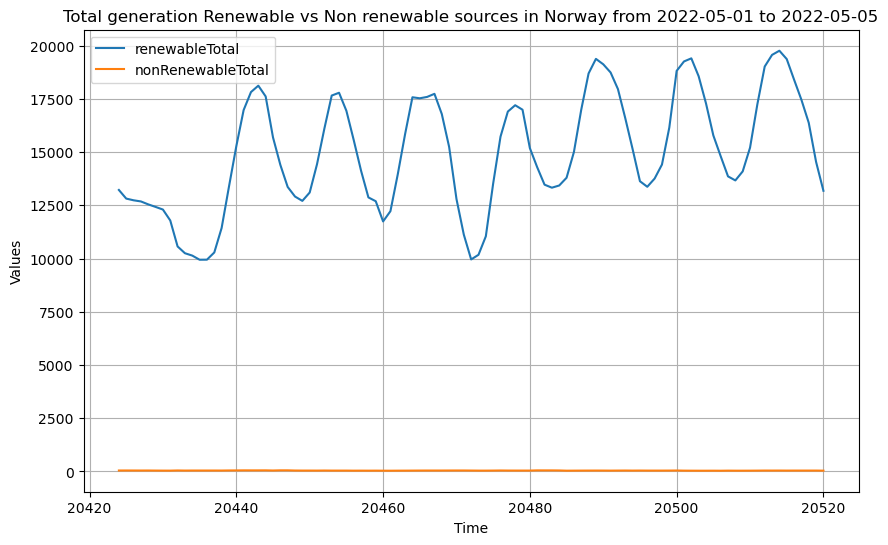

In [97]:
showHourlyPlotsforAllCountries(hourly_start_date,hourly_end_date)

## Longer duration energy data analysis 
---

Index(['Unnamed: 0', 'Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil',
       'Hydro Pumped Storage', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Nuclear', 'Solar', 'Waste', 'Wind Onshore',
       'startTime', 'endTime', 'renewableTotal', 'renewableTotalWS',
       'nonRenewableTotal', 'total', 'percentRenewable', 'percentRenewableWS'],
      dtype='object')


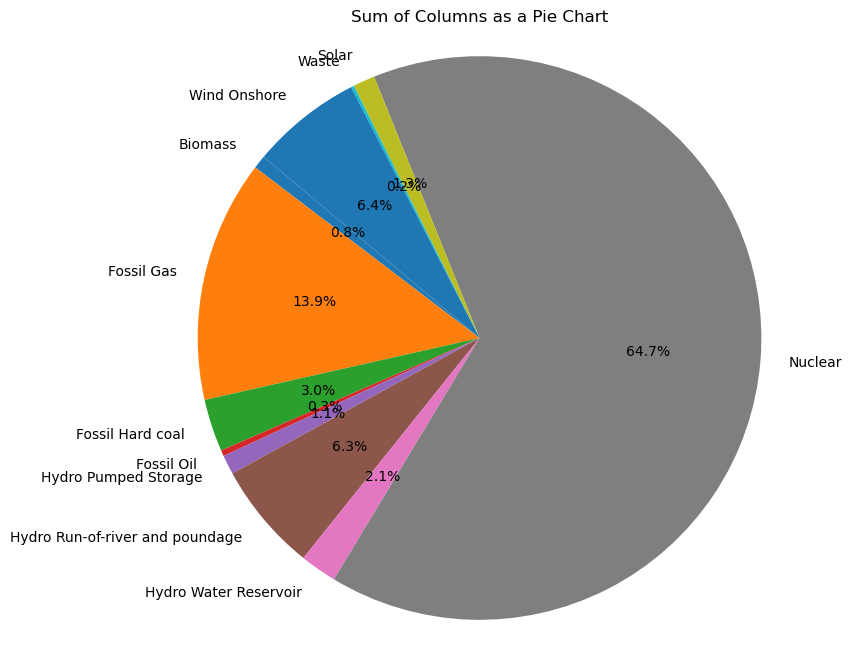

In [47]:
def f5():
    
    csv_file = 'rawData/FR-202001010000-202301010000-actual-60.0.csv'
    start_date = pd.to_datetime('2022-12-01')
    end_date = pd.to_datetime('2022-12-05')
    filtered_data = filter_data_by_date(csv_file, start_date, end_date)
    print(filtered_data.columns)
    columns_to_sum = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil',
       'Hydro Pumped Storage', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Nuclear', 'Solar', 'Waste', 'Wind Onshore']
    # Calculate the sum of each column
    column_sums = filtered_data[columns_to_sum].sum()
    # Generate a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sum of Columns as a Pie Chart')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie chart
    plt.show()
    
f5()

Index(['group_id', 'Biomass', 'Fossil Brown coal/Lignite', 'Fossil Gas',
       'Fossil Hard coal', 'Fossil Oil', 'Geothermal', 'Hydro Pumped Storage',
       'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Nuclear',
       'Other', 'Other renewable', 'Solar', 'Waste', 'Wind Offshore',
       'Wind Onshore', 'startTime', 'endTime', 'renewableTotal',
       'renewableTotalWS', 'nonRenewableTotal', 'total', 'percentRenewable',
       'percentRenewableWS'],
      dtype='object')


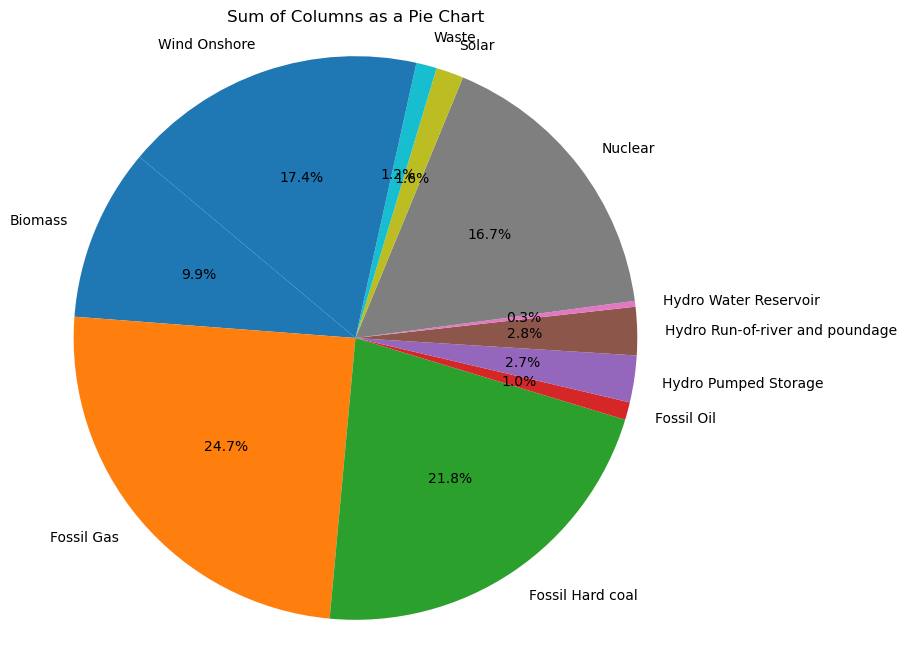

In [50]:
def f6():
    
    csv_file = './rawData/DE-202001010000-202301010000-actual-60.csv'
    start_date = pd.to_datetime('2020-12-01')
    end_date = pd.to_datetime('2020-12-10')
    filtered_data = filter_data_by_date(csv_file, start_date, end_date)
    print(filtered_data.columns)
    columns_to_sum = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil',
       'Hydro Pumped Storage', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Nuclear', 'Solar', 'Waste', 'Wind Onshore']
    # Calculate the sum of each column
    column_sums = filtered_data[columns_to_sum].sum()
    # Generate a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sum of Columns as a Pie Chart')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie chart
    plt.show()
    
f6()

## Comparing actual energy data with forecast data 
---


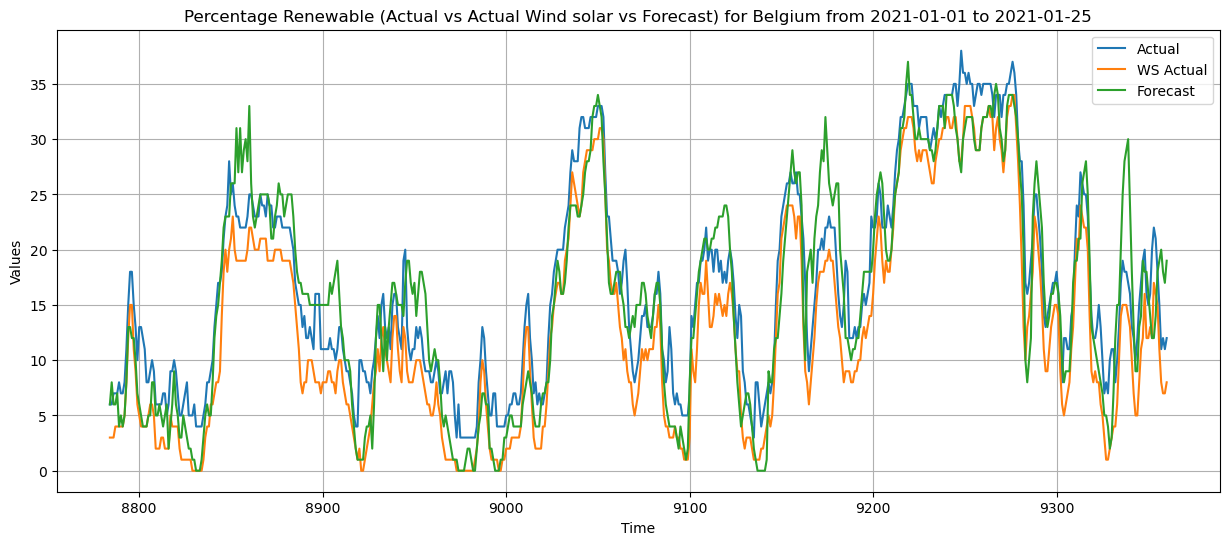

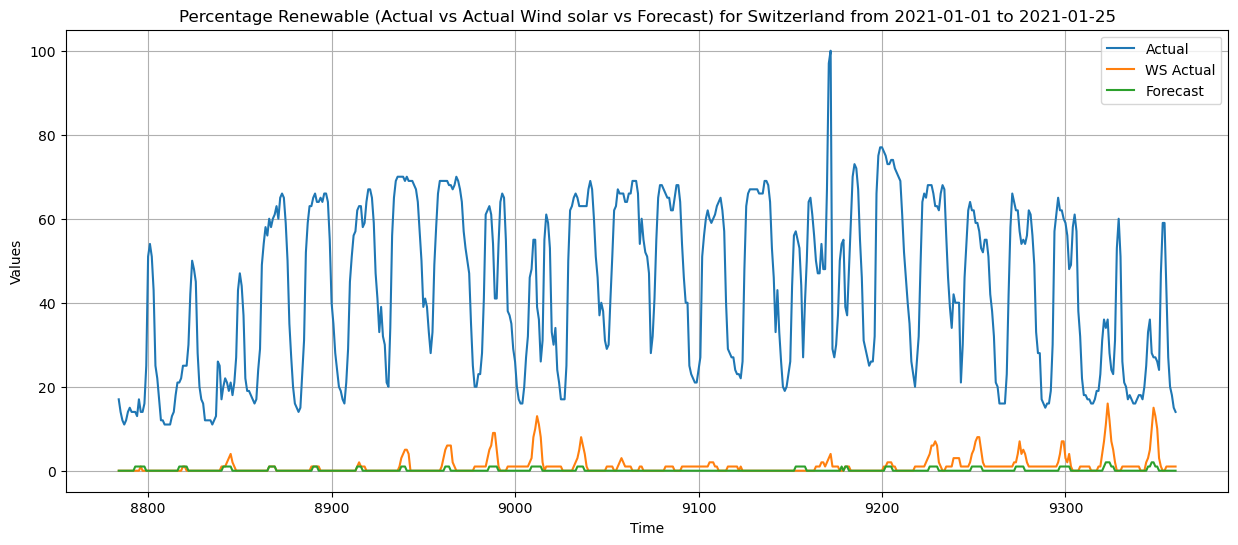

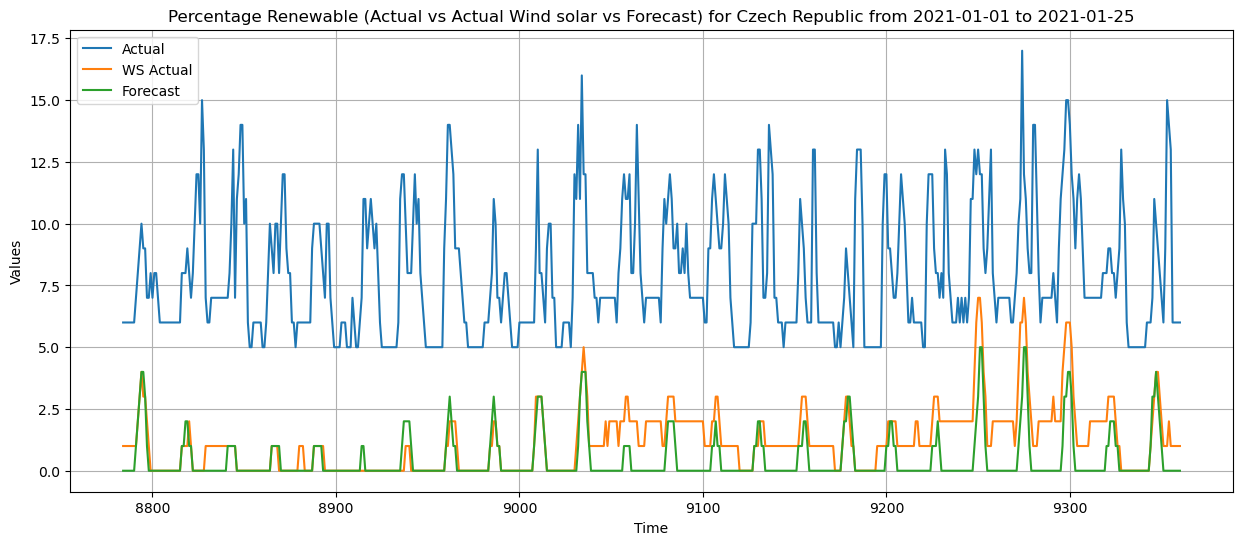

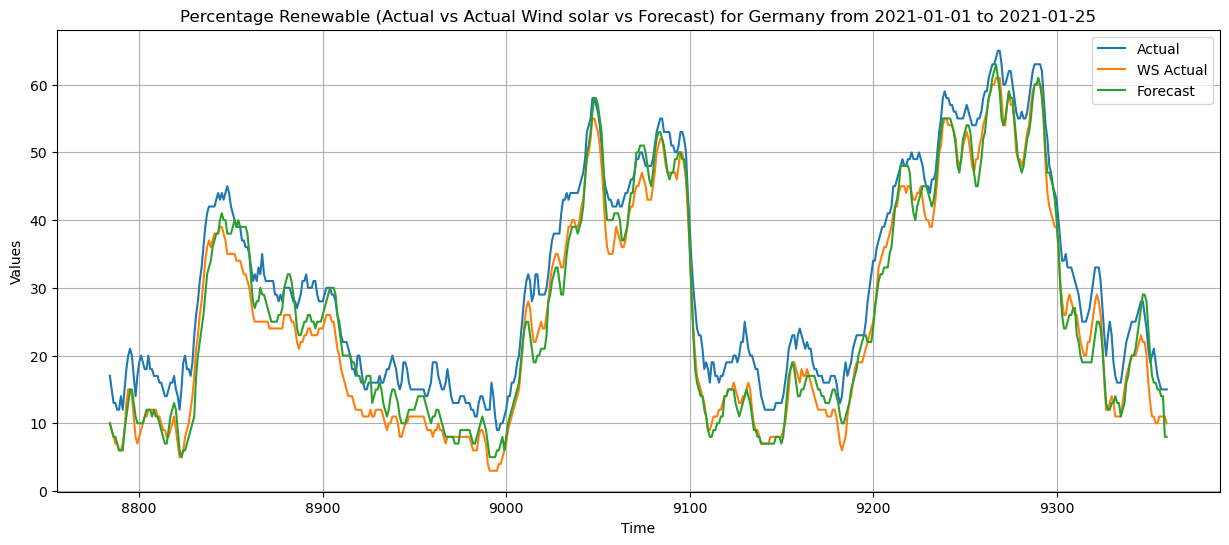

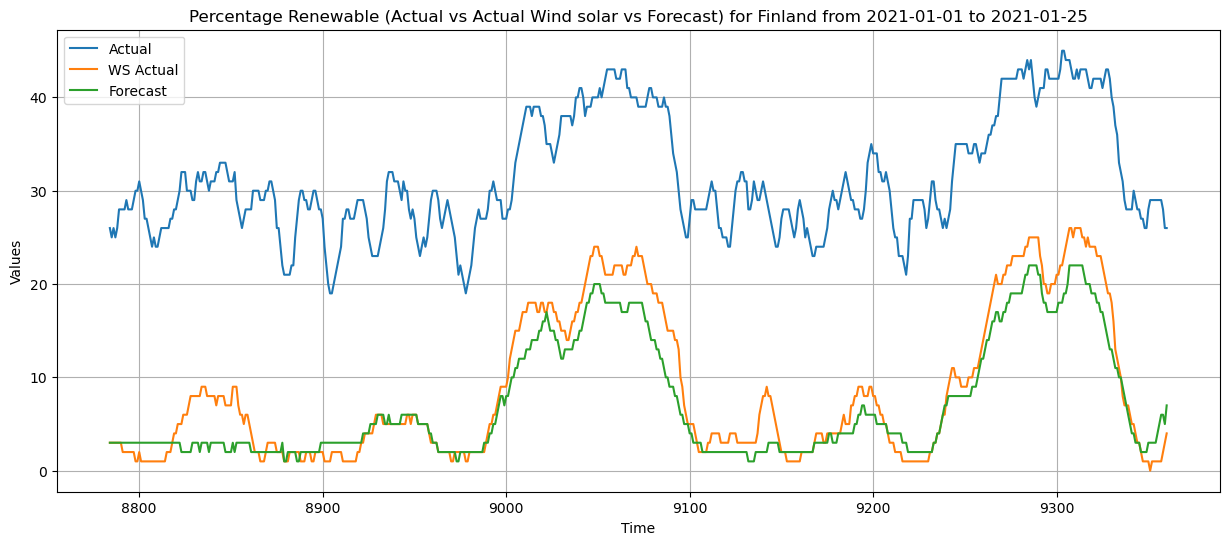

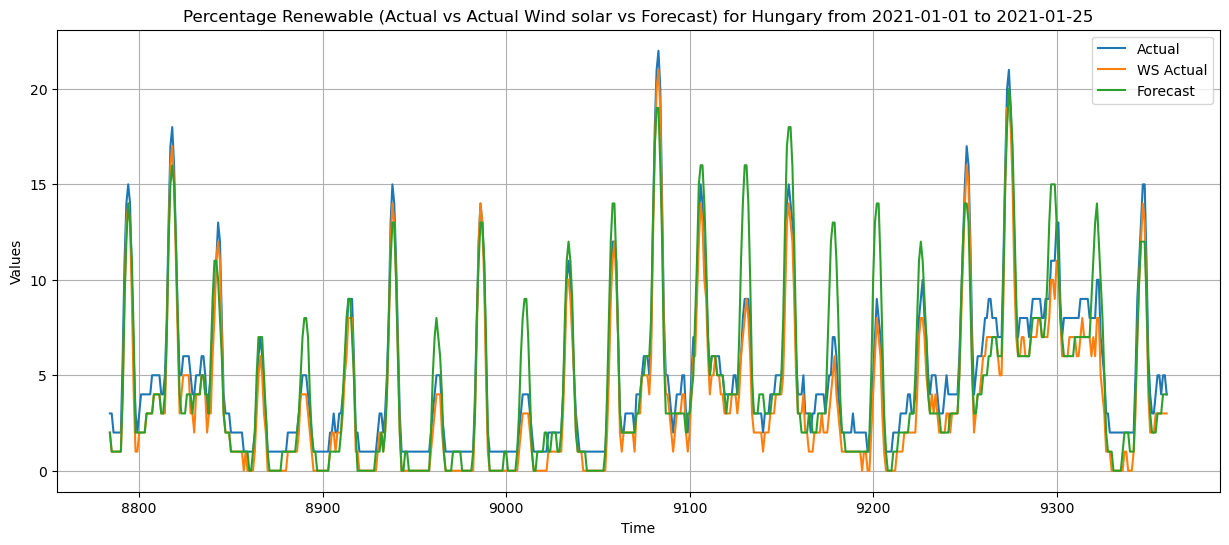

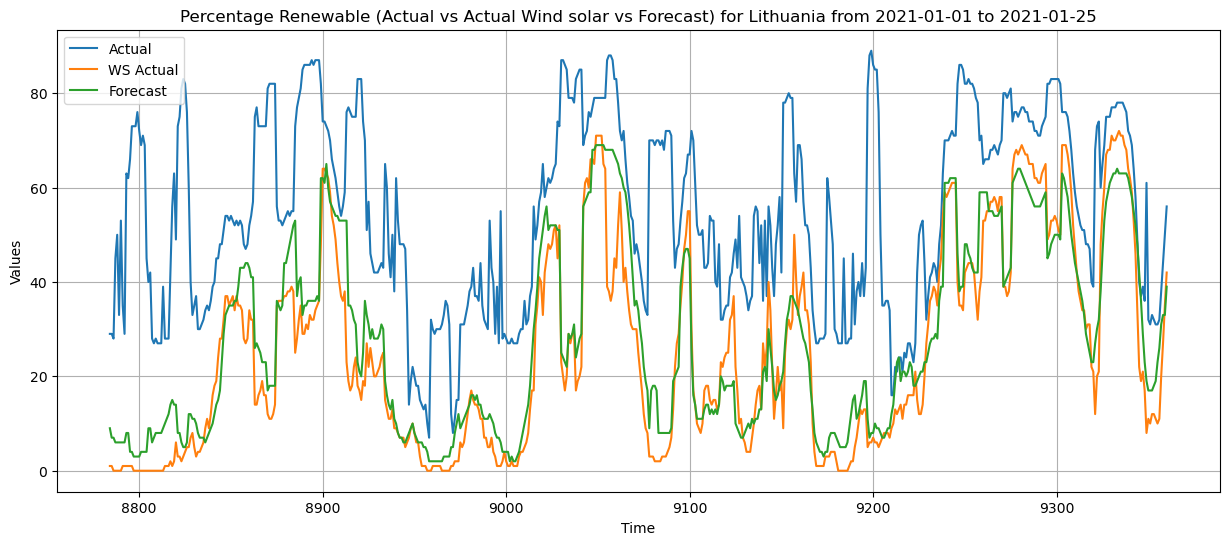

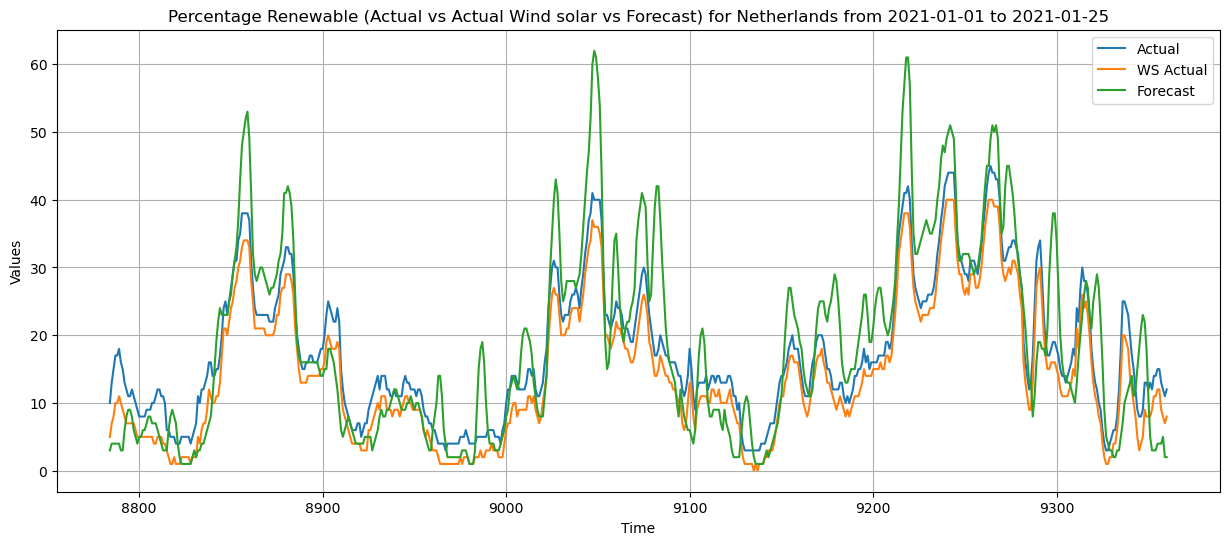

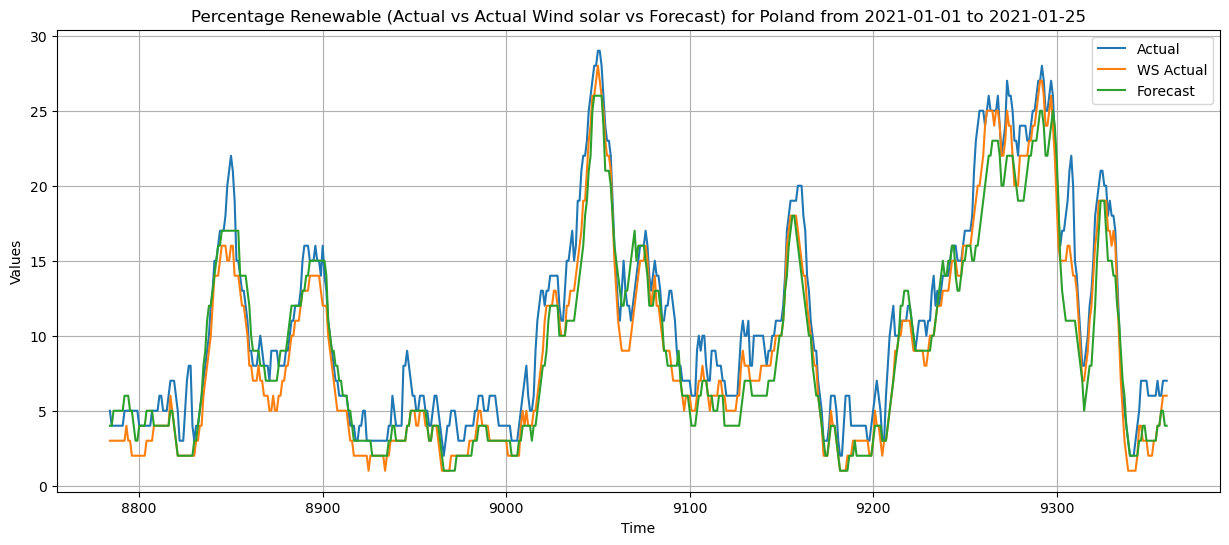

In [133]:
def getActualAndForecastData(code,start,end):
    at = getCountryData(code,"actual",start,end)
    fo = getCountryData(code,"forecast",start,end)
    newData = pd.DataFrame()
    newData["startTime"]=  at["startTime"]
    newData["Actual"] = at["percentRenewable"]
    newData["WS Actual"] = at["percentRenewableWS"]
    newData["Forecast"] = fo["percentRenewable"]
    return newData

def plotActualForecastPercentages(data,code,start,end):
    plot_multiple_line_charts(data, "Percentage Renewable (Actual vs Actual Wind solar vs Forecast) for "+countryName(code)+' from '+start+' to '+end , ["Actual","WS Actual","Forecast"])
    
def showActualForecastPlotsforAllCountries(start,end):
    clist = getCountryList()
    for c in clist :
        data = getActualAndForecastData(c,start,end)
        plotActualForecastPercentages(data,c,start,end)
        
showActualForecastPlotsforAllCountries("2021-01-01","2021-01-25")